In [2]:
import numpy as np
import pandas as pd
import pickle
df=pd.read_csv("/content/Train (1).csv")
df


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


> **Exploring the dataset about products reaching their customers on time and creating models to determine which one predicts the outcome better.**

In [3]:
# F = 1, M = 0
df['Gender'] = (df['Gender'] == 'F').astype(int)

In [4]:
df['Product_importance'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [5]:
# 0 = low, 1 = medium, 2 = high
df.loc[df['Product_importance'] == 'low', 'Product_importance'] = 0
df.loc[df['Product_importance'] == 'medium', 'Product_importance'] = 1
df.loc[df['Product_importance'] == 'high', 'Product_importance'] = 2

In [6]:
# 0 = Flight, 1 = Road, 2 = Ship
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].astype('category')
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].cat.codes

In [8]:
# 3 = D, 4 = F, 0 = A, 1 = B, C = 2
df['Warehouse_block'] = df['Warehouse_block'].astype('category')
df['Warehouse_block'] = df['Warehouse_block'].cat.codes

In [9]:
import matplotlib.pyplot as plt

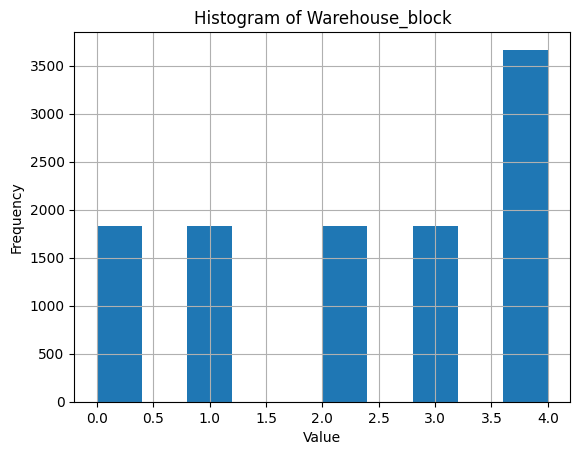

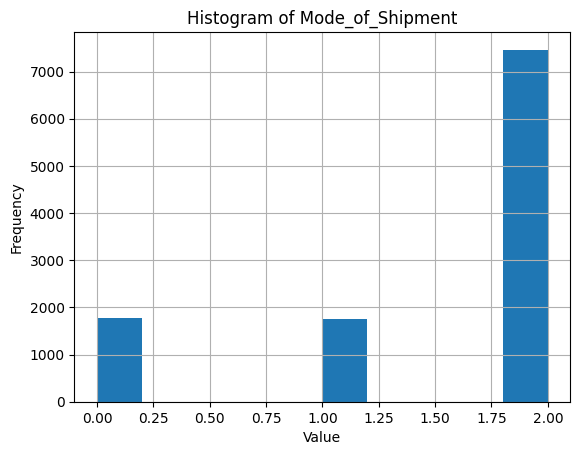

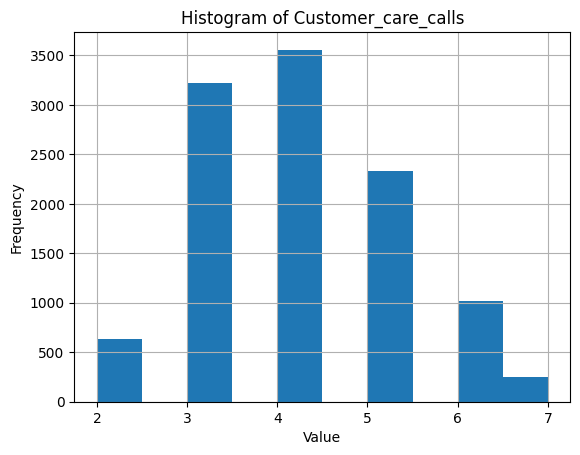

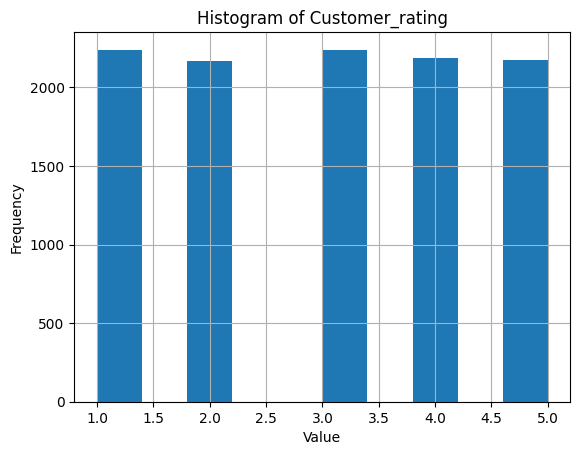

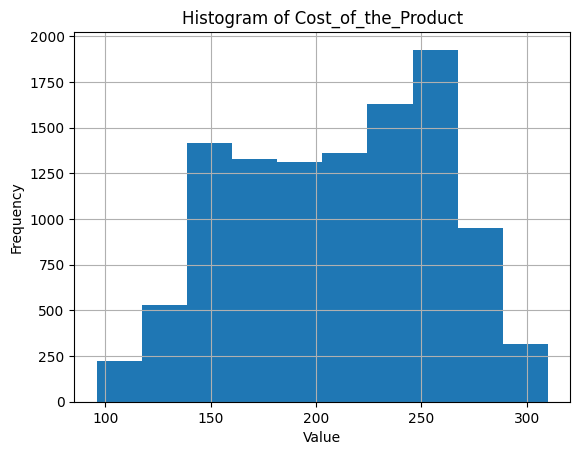

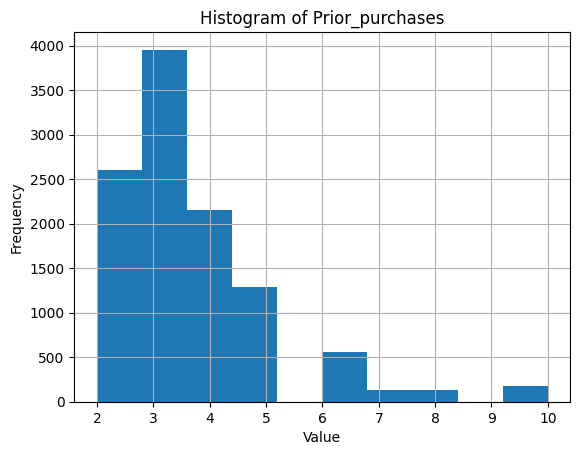

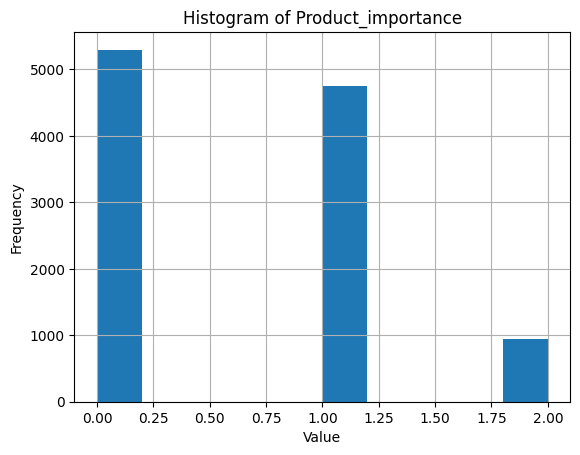

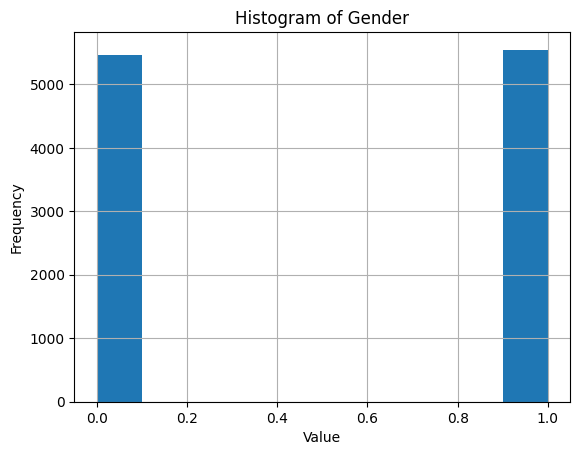

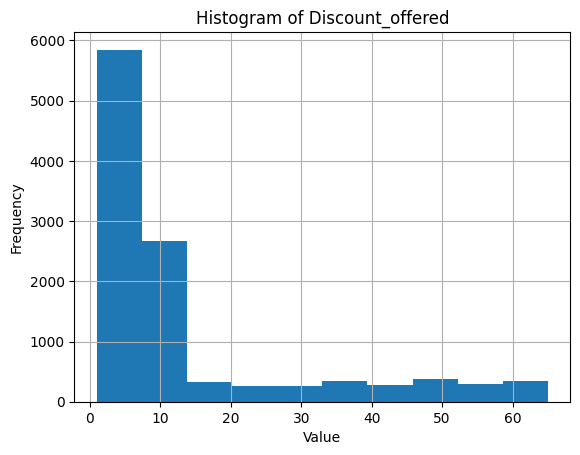

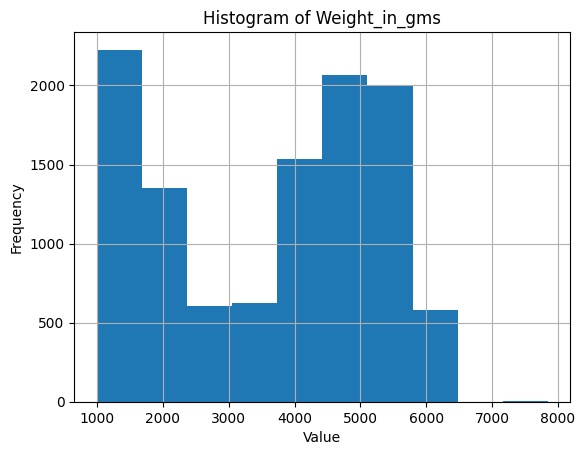

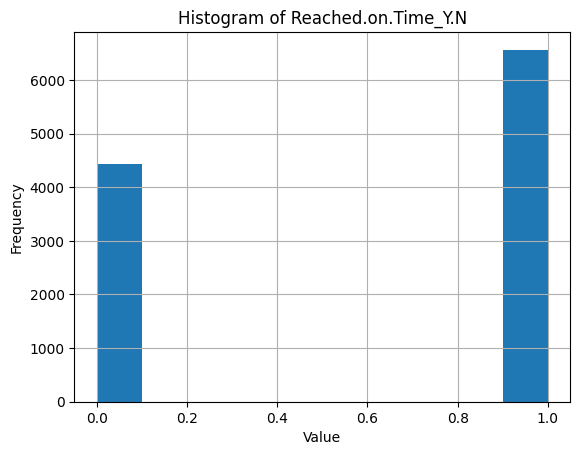

In [10]:
 for column in df.columns[1:]:
    df[column].hist()
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

Making dummy variables for categorical variables Warehouse_block and Mode_of_Shipment.

In [11]:
dummy_var = pd.get_dummies(df, columns=['Warehouse_block', 'Mode_of_Shipment'])

In [12]:
dummy_var = dummy_var.astype(int)
df = pd.concat([dummy_var], axis=1)
df = df.drop(columns=['ID'])

In [13]:
df

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_0,Warehouse_block_1,Warehouse_block_2,Warehouse_block_3,Warehouse_block_4,Mode_of_Shipment_0,Mode_of_Shipment_1,Mode_of_Shipment_2
0,4,2,177,3,0,1,44,1233,1,0,0,0,1,0,1,0,0
1,4,5,216,2,0,0,59,3088,1,0,0,0,0,1,1,0,0
2,2,2,183,4,0,0,48,3374,1,1,0,0,0,0,1,0,0
3,3,3,176,4,1,0,10,1177,1,0,1,0,0,0,1,0,0
4,2,2,184,3,1,1,46,2484,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1,1,1538,1,1,0,0,0,0,0,0,1
10995,4,1,232,5,1,1,6,1247,0,0,1,0,0,0,0,0,1
10996,5,4,242,5,0,1,4,1155,0,0,0,1,0,0,0,0,1
10997,5,2,223,6,1,0,2,1210,0,0,0,0,0,1,0,0,1


In [14]:
# putting the y variable at the end of the dataset

column_to_move = 'Reached.on.Time_Y.N'
column = df.pop(column_to_move)
df[column.name] = column

# Normalizing the data set

In [15]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

In [16]:
df_normalized

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_0,Warehouse_block_1,Warehouse_block_2,Warehouse_block_3,Warehouse_block_4,Mode_of_Shipment_0,Mode_of_Shipment_1,Mode_of_Shipment_2,Reached.on.Time_Y.N
0,4,2,0.378505,3,0,1,0.671875,0.033893,0,0,0,1,0,1,0,0,1
1,4,5,0.560748,2,0,0,0.906250,0.304894,0,0,0,0,1,1,0,0,1
2,2,2,0.406542,4,0,0,0.734375,0.346676,1,0,0,0,0,1,0,0,1
3,3,3,0.373832,4,1,0,0.140625,0.025712,0,1,0,0,0,1,0,0,1
4,2,2,0.411215,3,1,1,0.703125,0.216654,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,0.728972,5,1,1,0.000000,0.078451,1,0,0,0,0,0,0,1,1
10995,4,1,0.635514,5,1,1,0.078125,0.035939,0,1,0,0,0,0,0,1,0
10996,5,4,0.682243,5,0,1,0.046875,0.022498,0,0,1,0,0,0,0,1,0
10997,5,2,0.593458,6,1,0,0.015625,0.030533,0,0,0,0,1,0,0,1,0


# Making training, validation and testing data sets

In [18]:
X = df_normalized[df_normalized.columns[:-1]].values
y = df_normalized[df_normalized.columns[-1]].values

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# K nearest neighbors model

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=105)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=105)

In [21]:
y_prediction_knn = knn_model.predict(X_test)
print(classification_report(y_test, y_prediction_knn))

              precision    recall  f1-score   support

           0       0.60      0.79      0.68       640
           1       0.72      0.50      0.59       673

    accuracy                           0.64      1313
   macro avg       0.66      0.65      0.64      1313
weighted avg       0.66      0.64      0.63      1313



# Naive bayes model

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [24]:
y_prediction_nb = nb_model.predict(X_test)

In [25]:
print(classification_report(y_test, y_prediction_nb))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       640
           1       1.00      0.42      0.59       673

    accuracy                           0.70      1313
   macro avg       0.81      0.71      0.68      1313
weighted avg       0.81      0.70      0.68      1313



# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lg_model = LogisticRegression(max_iter=1000)
lg_model = lg_model.fit(X_train, y_train)

In [28]:
y_prediction_lg = lg_model.predict(X_test)
print(classification_report(y_test, y_prediction_lg))

              precision    recall  f1-score   support

           0       0.63      0.83      0.72       640
           1       0.77      0.54      0.63       673

    accuracy                           0.68      1313
   macro avg       0.70      0.68      0.68      1313
weighted avg       0.70      0.68      0.67      1313



# Support Vector Machines

In [29]:
from sklearn.svm import SVC

In [30]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [31]:
y_prediction_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_prediction_svm))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77       640
           1       0.97      0.45      0.62       673

    accuracy                           0.71      1313
   macro avg       0.80      0.72      0.69      1313
weighted avg       0.80      0.71      0.69      1313



# Random forest classification

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

Since random forest classification doesn't need normalization, we will be splitting the original dataset before normalization.

In [33]:
X_df = df[df.columns[:-1]].values
y_df = df[df.columns[-1]].values

oversampler = RandomOverSampler(random_state=42)

X_resampled_df, y_resampled_df = oversampler.fit_resample(X_df, y_df)

X_train_df, X_temp_df, y_train_df, y_temp_df = train_test_split(X_resampled_df, y_resampled_df, test_size=0.2, random_state=42)
X_val_df, X_test_df, y_val_df, y_test_df = train_test_split(X_temp_df, y_temp_df, test_size=0.5, random_state=42)

In [34]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_df, y_train_df)

RandomForestClassifier(random_state=42)

In [35]:
y_prediction_rf = rf.predict(X_test_df)
print(classification_report(y_test_df, y_prediction_rf))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       640
           1       0.86      0.59      0.70       673

    accuracy                           0.74      1313
   macro avg       0.77      0.74      0.73      1313
weighted avg       0.77      0.74      0.73      1313



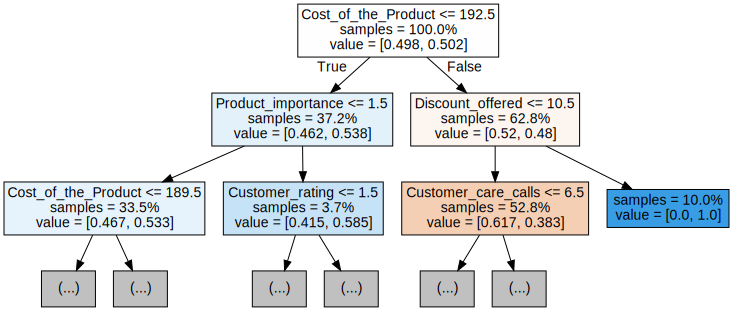

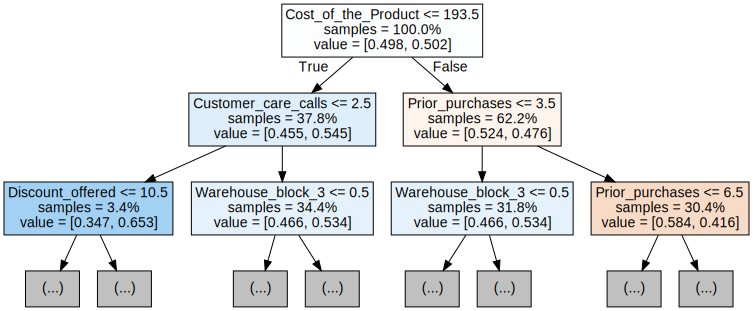

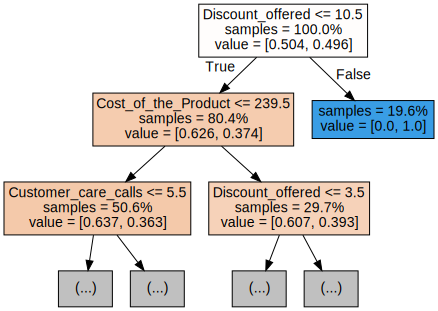

In [36]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=df.columns[:-1],
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

After visualizing our tree, we will tune some hyperparameters.

n_estimators - number of trees in the forest; increasing this can improve performance but increase the time it need to train and predict



In [37]:
param = {'n_estimators' : randint(50,500)}

rand_search = RandomizedSearchCV(rf, param_distributions = param, n_iter = 5, cv = 5)

rand_search.fit(X_train_df, y_train_df)

best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 215}


The best hyperparameters that were found by the algorithm is 463 trees in a forest.

Model below shows the best parameters.

In [39]:
best_rf = RandomForestClassifier(n_estimators=350, random_state=42)
best_rf.fit(X_train_df, y_train_df)

y_best_prediction_rf = best_rf.predict(X_test_df)
print(classification_report(y_test_df, y_best_prediction_rf))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       640
           1       0.86      0.58      0.69       673

    accuracy                           0.74      1313
   macro avg       0.77      0.74      0.73      1313
weighted avg       0.77      0.74      0.73      1313



Since the number of trees doesn't improve performance it will be set to 350 to improve run time.

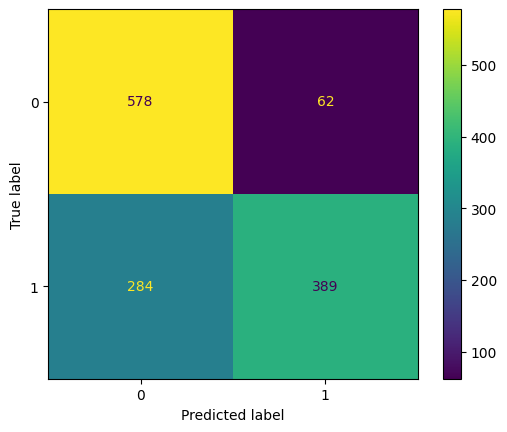

In [40]:
cm = confusion_matrix(y_test_df, y_best_prediction_rf)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

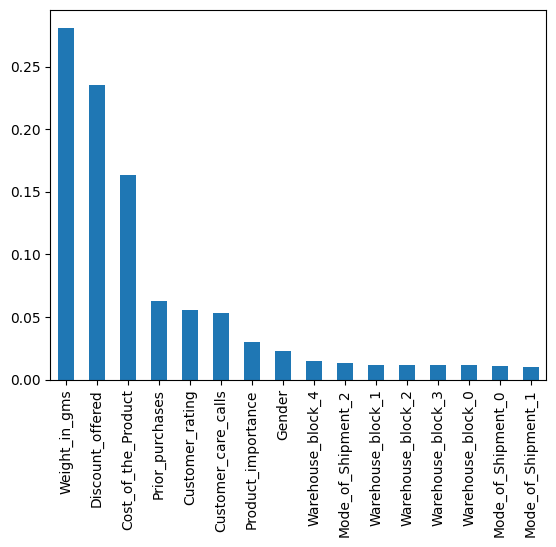

In [41]:
feature_importances = pd.Series(best_rf.feature_importances_, index=df.columns[:-1]).sort_values(ascending=False)
feature_importances.plot.bar();

In [42]:
X_no = df[df.columns[:-1]].values
y_no = df[df.columns[-1]].values

X_train_no, X_temp_no, y_train_no, y_temp_no = train_test_split(X_no, y_no, test_size=0.2, random_state=42)
X_val_no, X_test_no, y_val_no, y_test_no = train_test_split(X_temp_no, y_temp_no, test_size=0.5, random_state=42)

In [43]:
best_rf_no = RandomForestClassifier(n_estimators=350, random_state=42)
best_rf_no.fit(X_train_no, y_train_no)

y_best_prediction_rf_no = best_rf_no.predict(X_test_no)
print(classification_report(y_test_no, y_best_prediction_rf_no))

              precision    recall  f1-score   support

           0       0.57      0.71      0.63       445
           1       0.76      0.63      0.69       655

    accuracy                           0.66      1100
   macro avg       0.66      0.67      0.66      1100
weighted avg       0.68      0.66      0.67      1100



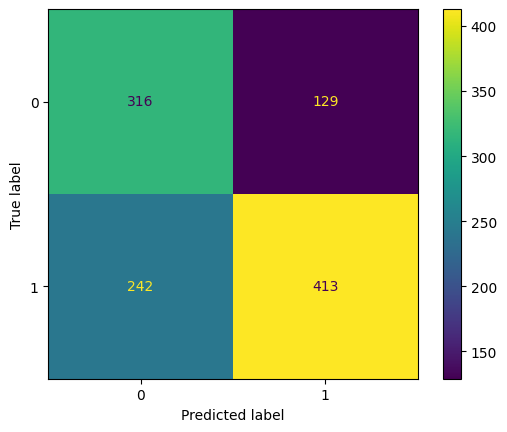

In [44]:
cm_no = confusion_matrix(y_test_no, y_best_prediction_rf_no)
ConfusionMatrixDisplay(confusion_matrix=cm_no).plot();


### Scaling the features using Standard Scaler Scaler:





In [45]:
X = df.drop(['Reached.on.Time_Y.N'], axis=1)
y = df['Reached.on.Time_Y.N']

In [46]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(X_scaled)


       Customer_care_calls  Customer_rating  Cost_of_the_Product  \
0                -0.047711        -0.700755            -0.690722   
1                -0.047711         1.421578             0.120746   
2                -1.799887        -0.700755            -0.565881   
3                -0.923799         0.006689            -0.711529   
4                -1.799887        -0.700755            -0.545074   
...                    ...              ...                  ...   
10994            -0.047711        -1.408199             0.869792   
10995            -0.047711        -1.408199             0.453655   
10996             0.828377         0.714133             0.661724   
10997             0.828377        -0.700755             0.266394   
10998            -1.799887         1.421578            -1.148472   

       Prior_purchases  Product_importance    Gender  Discount_offered  \
0            -0.372735           -0.942576  0.991760          1.889983   
1            -1.029424           -0

In [47]:
X = X_scaled
X.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_0,Warehouse_block_1,Warehouse_block_2,Warehouse_block_3,Warehouse_block_4,Mode_of_Shipment_0,Mode_of_Shipment_1,Mode_of_Shipment_2
0,-0.047711,-0.700755,-0.690722,-0.372735,-0.942576,0.991760,1.889983,-1.468240,-0.447189,-0.447189,-0.447189,2.235458,-0.707059,2.278079,-0.436459,-1.45248
1,-0.047711,1.421578,0.120746,-1.029424,-0.942576,-1.008308,2.815636,-0.333893,-0.447189,-0.447189,-0.447189,-0.447336,1.414310,2.278079,-0.436459,-1.45248
2,-1.799887,-0.700755,-0.565881,0.283954,-0.942576,-1.008308,2.136824,-0.159002,2.236190,-0.447189,-0.447189,-0.447336,-0.707059,2.278079,-0.436459,-1.45248
3,-0.923799,0.006689,-0.711529,0.283954,0.616430,-1.008308,-0.208162,-1.502484,-0.447189,2.236190,-0.447189,-0.447336,-0.707059,2.278079,-0.436459,-1.45248
4,-1.799887,-0.700755,-0.545074,-0.372735,0.616430,0.991760,2.013404,-0.703244,-0.447189,-0.447189,2.236190,-0.447336,-0.707059,2.278079,-0.436459,-1.45248


Balancing target variable using class weights:

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights_dict = dict(enumerate(class_weights))

In [49]:
print(class_weights_dict)

{0: 1.2424456368257555, 1: 0.8367249904906808}



Predictions using Boosting algorithms:

Gradient Boosting (69.2% accuracy):

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class_weights = class_weight.compute_sample_weight('balanced', y_train)

gbc_model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    subsample=1.0,
    random_state=42
)


gbc_model.fit(X_train, y_train, sample_weight=class_weights)


y_train_pred_gbc = gbc_model.predict(X_train)
y_test_pred_gbc = gbc_model.predict(X_test)

# Calculate the accuracy of the model on the training and testing sets
train_acc = accuracy_score(y_train, y_train_pred_gbc)
test_acc = accuracy_score(y_test, y_test_pred_gbc)

# Print the accuracy scores
print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)

Train accuracy:  0.6876917831571769
Test accuracy:  0.6918181818181818


In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred_gbc))

              precision    recall  f1-score   support

           0       0.57      0.97      0.72       895
           1       0.96      0.50      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.77      0.74      0.69      2200
weighted avg       0.80      0.69      0.68      2200



Adaptive Boosting (64.7% accuracy)


In [52]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.01,
    algorithm='SAMME.R',
    random_state=42
)

abc.fit(X_train, y_train, sample_weight=class_weights)

y_train_pred = abc.predict(X_train)
y_test_pred = abc.predict(X_test)

# Calculate the accuracy of the model on the training and testing sets
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)

Train accuracy:  0.6431412660529605
Test accuracy:  0.6472727272727272


In [53]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       895
           1       1.00      0.41      0.58      1305

    accuracy                           0.65      2200
   macro avg       0.77      0.70      0.64      2200
weighted avg       0.81      0.65      0.63      2200



Extreme Gradient Boosting (69.1% accuracy):

In [54]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)


params = {
    'objective': 'binary:logistic',
    #'eval_metric': 'logloss',
    'eta': 0.01,
    'max_depth': 3,
    'subsample': 1.0,
    'colsample_bytree': 0.8,
    'seed': 42
}


num_rounds = 1000
xgb_model = xgb.train(params, dtrain, num_rounds)

y_train_pred_xgb = xgb_model.predict(dtrain)
y_test_pred_xgb = xgb_model.predict(dtest)

y_train_pred_xgb[y_train_pred_xgb >= 0.5] = 1
y_train_pred_xgb[y_train_pred_xgb < 0.5] = 0

y_test_pred_xgb[y_test_pred_xgb >= 0.5] = 1
y_test_pred_xgb[y_test_pred_xgb < 0.5] = 0

# Calculate the accuracy of the model on the training and testing sets
train_acc = accuracy_score(y_train, y_train_pred_xgb)
test_acc = accuracy_score(y_test, y_test_pred_xgb)

# Print the accuracy scores
print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)

Train accuracy:  0.7022388907830436
Test accuracy:  0.6904545454545454


In [55]:
print(classification_report(y_test,y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.58      0.90      0.70       895
           1       0.89      0.54      0.68      1305

    accuracy                           0.69      2200
   macro avg       0.73      0.72      0.69      2200
weighted avg       0.76      0.69      0.69      2200



Saving trained model

In [56]:
import pickle

In [57]:
filename = 'e-com.sav'
pickle.dump(rf, open(filename, 'wb'))

In [58]:
loaded_model = pickle.load(open('e-com.sav', 'rb'))


In [59]:
for column in X.columns:
  print(column)

Customer_care_calls
Customer_rating
Cost_of_the_Product
Prior_purchases
Product_importance
Gender
Discount_offered
Weight_in_gms
Warehouse_block_0
Warehouse_block_1
Warehouse_block_2
Warehouse_block_3
Warehouse_block_4
Mode_of_Shipment_0
Mode_of_Shipment_1
Mode_of_Shipment_2
